# Load dataset

In [9]:
import pandas as pd
import pymongo
from pymongo import MongoClient

cluster = MongoClient("mongodb://localhost:27017/?readPreference=primary&appname=MongoDB%20Compass%20Community&ssl=false")
db = cluster["NLP"]
hespress_ds = db.hespress_politique
hespress_ds['title'].replace(r'\s+|\\n', ' ', regex=True, inplace=True) 
hespress_ds['article'].replace(r'\s+|\\n', ' ', regex=True, inplace=True) 
hespress_ds.head()

,Unnamed: 0,url,title,article,news
0,0,https://www.hespress.com/%d8%a7%d9%84%d8%b9%d8...,"العثماني ينتشي بـ""تحكم نسبي"" في الجائحة ويعد ب...",سجل رئيس الحكومة بارتياح، “التقدم الجيد” الذي...,real
1,1,https://www.hespress.com/%d8%a7%d9%84%d8%ad%d9...,الحكومة المغربية تقرر تمديد حالة الطوارىء الصح...,قرر مجلس الحكومة، المنعقد اليوم الخميس في الر...,real
2,2,https://www.hespress.com/%d8%a8%d9%88%d8%b1%d9...,"بوريطة: ""الجيل الجديد"" يضمن الوحدة الإفريقية",قال ناصر بوريطة، وزير الشؤون الخارجية والتعاو...,real
3,3,https://www.hespress.com/%d8%aa%d8%b1%d8%b4%d9...,"ترشيح ""الأعيان والكفاءات"" يخلق صراعا بين أجنحة...",يعيش حزب الأصالة والمعاصرة (البام) على وقع صر...,real
4,4,https://www.hespress.com/%d8%a7%d9%84%d9%83%d8...,"""الكتاب"" يجمد عضوية رئيس مجلس الصخيرات",أعلن المكتب السياسي لحزب التقدم والاشتراكية، ...,real


In [12]:
hespress_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1032 entries, 0 to 1031
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  1032 non-null   int64 
 1   url         1032 non-null   object
 2   title       1032 non-null   object
 3   article     1032 non-null   object
 4   news        1032 non-null   object
dtypes: int64(1), object(4)
memory usage: 40.4+ KB


In [10]:
alhoudod_ds = db.alhoudod_politique
alhoudod_ds['title'].replace(r'\s+|\\n', ' ', regex=True, inplace=True)
alhoudod_ds['article'].replace(r'\s+|\\n', ' ', regex=True, inplace=True) 
alhoudod_ds.head()

,Unnamed: 0,url,title,article,news
0,0,https://alhudood.net/42493/,النظام السوري يؤكد التزامه بمفاوضات صياغة الد...,أكّد النظام السوري التزامه التام بمفاوضات صيا...,fake
1,1,https://alhudood.net/42452/,تونس: الحكم ٣٠ عاماً على شباب دخّنوا الحشيش ف...,أصدرت المحكمة الابتدائية في الكاف بتونس، حكما...,fake
2,2,https://alhudood.net/42437/,إسرائيل تعتقل مجموعة من فلسطينيي الداخل بتهمة...,شنّت المخابرات الإسرائيلية حملة اعتقالات واسع...,fake
3,3,https://alhudood.net/42434/,أهالي طرابلس يشعلون البلدية بدل أن يلعنوا الظ...,بعد أعوام طويلة تحملوا خلالها البطالة ورداءة ...,fake
4,4,https://alhudood.net/42431/,فرح إسلامي عارم بانقلاب جيش ميانمار الذي يبيد...,عمّت البهجة ربوع العالم الإسلامي وأوساط المفك...,fake


In [13]:
alhoudod_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1007 entries, 0 to 1006
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  1007 non-null   int64 
 1   url         1007 non-null   object
 2   title       1007 non-null   object
 3   article     1007 non-null   object
 4   news        1007 non-null   object
dtypes: int64(1), object(4)
memory usage: 39.5+ KB


In [14]:
dataset = pd.concat([hespress_ds,alhoudod_ds])
dataset.head()

,Unnamed: 0,url,title,article,news
0,0,https://www.hespress.com/%d8%a7%d9%84%d8%b9%d8...,"العثماني ينتشي بـ""تحكم نسبي"" في الجائحة ويعد ب...",سجل رئيس الحكومة بارتياح، “التقدم الجيد” الذي...,real
1,1,https://www.hespress.com/%d8%a7%d9%84%d8%ad%d9...,الحكومة المغربية تقرر تمديد حالة الطوارىء الصح...,قرر مجلس الحكومة، المنعقد اليوم الخميس في الر...,real
2,2,https://www.hespress.com/%d8%a8%d9%88%d8%b1%d9...,"بوريطة: ""الجيل الجديد"" يضمن الوحدة الإفريقية",قال ناصر بوريطة، وزير الشؤون الخارجية والتعاو...,real
3,3,https://www.hespress.com/%d8%aa%d8%b1%d8%b4%d9...,"ترشيح ""الأعيان والكفاءات"" يخلق صراعا بين أجنحة...",يعيش حزب الأصالة والمعاصرة (البام) على وقع صر...,real
4,4,https://www.hespress.com/%d8%a7%d9%84%d9%83%d8...,"""الكتاب"" يجمد عضوية رئيس مجلس الصخيرات",أعلن المكتب السياسي لحزب التقدم والاشتراكية، ...,real


In [16]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2039 entries, 0 to 1006
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  2039 non-null   int64 
 1   url         2039 non-null   object
 2   title       2039 non-null   object
 3   article     2039 non-null   object
 4   news        2039 non-null   object
dtypes: int64(1), object(4)
memory usage: 95.6+ KB


In [15]:
dataset['news'].value_counts()

real    1032
fake    1007
Name: news, dtype: int64

# Define the train and test datasets

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(dataset["title"], dataset['news'], test_size=.2, random_state=100 )

In [18]:
len(X_train)

1631

In [19]:
len(X_test)

408

# Random Forest Classifier

In [20]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from pipeline import TextPreProcessing, NlpPipeline
from sklearn.ensemble import RandomForestClassifier

random_forest_model = Pipeline([
    ('pre-processing', TextPreProcessing()),
    ('nlp', NlpPipeline()),
    ('TF-IDF',TfidfVectorizer()),
    ('Random forest classifier', RandomForestClassifier())
])

random_forest_model.fit(X_train, Y_train)

Pipeline(steps=[('pre-processing', TextPreProcessing()), ('nlp', NlpPipeline()),
                ('TF-IDF', TfidfVectorizer()),
                ('Random forest classifier', RandomForestClassifier())])

In [22]:
from sklearn.metrics import accuracy_score

rf_test_predictions =  random_forest_model.predict(X_test)
print(f"Train accuracy score is {accuracy_score(Y_test, rf_test_predictions):.2f}")

Train accuracy score is 0.90


[[161  40]
 [  2 205]]


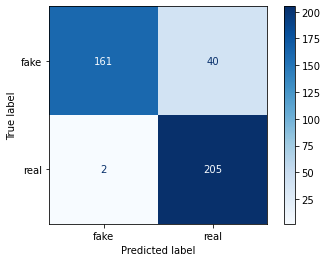

In [23]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

conf_matrix = plot_confusion_matrix(random_forest_model, X_test, Y_test,
                                 cmap=plt.cm.Blues)
print(conf_matrix.confusion_matrix)
plt.show()

In [24]:
import pickle

pickle.dump(random_forest_model, open('models/fakeNewsRFC.pkl', 'wb'))

# Support Vector Machine

In [25]:
from sklearn.svm import SVC

SVC_model = Pipeline([
    ('pre-processing', TextPreProcessing()),
    ('nlp', NlpPipeline()),
    ('TF-IDF',TfidfVectorizer()),
    ('Support Vector Machine', SVC())
])

SVC_model.fit(X_train, Y_train)

Pipeline(steps=[('pre-processing', TextPreProcessing()), ('nlp', NlpPipeline()),
                ('TF-IDF', TfidfVectorizer()),
                ('Support Vector Machine', SVC())])

In [26]:
SVC_test_predictions =  SVC_model.predict(X_test)
print(f"Train accuracy score is {accuracy_score(Y_test, SVC_test_predictions):.2f}")

Train accuracy score is 0.96


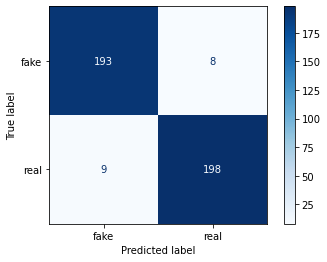

In [27]:
conf_matrix = plot_confusion_matrix(SVC_model, X_test, Y_test,
                                 cmap=plt.cm.Blues)
plt.show()

In [28]:
import pickle

pickle.dump(SVC_model, open('models/fakeNewsSVC.pkl', 'wb'))

# Logistic Regression

In [29]:
from sklearn.linear_model import LogisticRegression

logistic_regression_model = Pipeline([
    ('pre-processing', TextPreProcessing()),
    ('nlp', NlpPipeline()),
    ('TF-IDF',TfidfVectorizer()),
    ('Logistic Regression', LogisticRegression())
])

logistic_regression_model.fit(X_train, Y_train)

Pipeline(steps=[('pre-processing', TextPreProcessing()), ('nlp', NlpPipeline()),
                ('TF-IDF', TfidfVectorizer()),
                ('Logistic Regression', LogisticRegression())])

In [30]:
LR_test_predictions =  logistic_regression_model.predict(X_test)
print(f"Train accuracy score is {accuracy_score(Y_test, LR_test_predictions):.2f}")

Train accuracy score is 0.96


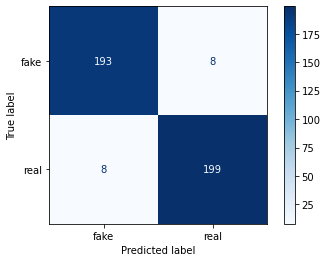

In [31]:
conf_matrix = plot_confusion_matrix(logistic_regression_model, X_test, Y_test,
                                 cmap=plt.cm.Blues)
plt.show()

In [32]:
import pickle

pickle.dump(logistic_regression_model, open('models/fakeNewsLR.pkl', 'wb'))